<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Assignment2-Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Asignment
Implement feature reduction and classification tasks, as described below, in Python. You may utilize built-in libraries. You will be utilizing the Spambase data set described further in section

### PCA
The Spambase data set from the machine learning repository consists of 57 features. Implement feature reduction with principal component analysis (PCA). Let the number of features after reduction be s, where s < 57. Explain how you chose an appropriate value for s.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# read in dataset
data = np.genfromtxt('spambase.data', delimiter=',')
data[:,-1]

array([1., 1., 1., ..., 0., 0., 0.])

In [5]:
# get column names from names file to understand the features
f = open('spambase.names', 'r')
lines = [line.strip() for line in f]
f.close()
# comment lines start with | or 1 in this case + empty lines; colnames and type are separated by :
colnames = [line.partition(':')[0] for line in lines if not (len(line) == 0 or line[0] == '|' or line[0] == '1')]
# need to add the name for the final column
colnames.append('spam')
len(colnames)

58

In [7]:
# store as DataFrame
import pandas as pd
df = pd.DataFrame(data, columns=colnames)

# Nicer view of the data, easier to explore
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0




PCA Explained Variance
[0.11549281 0.06372187 0.03469573]




<Figure size 432x288 with 0 Axes>

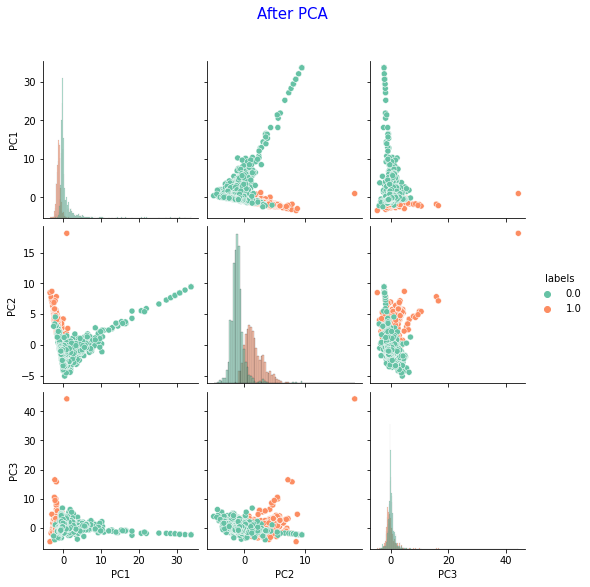

In [12]:
"""
We do feature reduction with PCA (Principal Component Analysis).

 Look at the value of "Explained Variance" of
the principal components and select number of components such that the sum of
explained variance is over 0.85
"""




#***********************************
# Standardizing the features
ArraySS = StandardScaler().fit_transform(df) 


#****************************************
# Perform PCA
pca = PCA(n_components=3)
PCAData = pca.fit_transform(ArraySS)

#****************************************
# Explained Variance
print("\n")
print("PCA Explained Variance")
print(pca.explained_variance_ratio_)
print("\n")

#****************************************
# DataFrame after extracting Principal Components
columns = ["PC1", "PC2", "PC3"]
dfMPCA = pd.DataFrame(data = PCAData, columns = columns)

dfMPCA["labels"] = df["spam"]


#***********************************
# Pairplot
plt.figure(2)
f2 = sns.pairplot(dfMPCA, hue="labels", diag_kind="hist", palette="Set2")
f2.fig.suptitle("After PCA", y=1.08, color="#0000ff", fontsize=15)
plt.show()

